In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
data,target = fetch_california_housing(return_X_y=True)

In [11]:
X_full,X_test,y_full,y_test = train_test_split(data, target, train_size=0.7, random_state=0)

In [12]:
X_full.shape

(14447, 8)

In [13]:
X_test.shape

(6193, 8)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_full)
X_test = scaler.transform(X_test)

In [18]:
model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
        keras.layers.Dense(1)                    

]
)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 30)                270       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


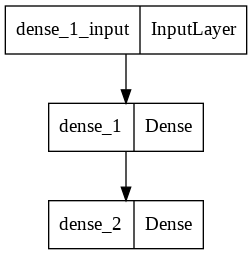

In [20]:
keras.utils.plot_model(model)

In [24]:
model.compile(loss='mean_squared_error', 
                    optimizer='sgd', metrics=['accuracy', 'mse'])

In [25]:
history = model.fit(x=X_train, 
                    y=y_train,
                    epochs=20, 
                    batch_size=32,
                    validation_split=0.2
                    )

Epoch 1/20
362/362 [==============================] - 2s 4ms/step - loss: 1.3204 - accuracy: 0.0029 - mse: 1.3204 - val_loss: 1.3364 - val_accuracy: 0.0028 - val_mse: 1.3364
Epoch 2/20
362/362 [==============================] - 1s 4ms/step - loss: 1.3209 - accuracy: 0.0029 - mse: 1.3209 - val_loss: 1.3326 - val_accuracy: 0.0028 - val_mse: 1.3326
Epoch 3/20
362/362 [==============================] - 1s 4ms/step - loss: 1.3194 - accuracy: 0.0029 - mse: 1.3194 - val_loss: 1.3745 - val_accuracy: 0.0028 - val_mse: 1.3745
Epoch 4/20
362/362 [==============================] - 1s 4ms/step - loss: 1.3198 - accuracy: 0.0029 - mse: 1.3198 - val_loss: 1.3419 - val_accuracy: 0.0028 - val_mse: 1.3419
Epoch 5/20
362/362 [==============================] - 1s 4ms/step - loss: 1.3188 - accuracy: 0.0029 - mse: 1.3188 - val_loss: 1.3336 - val_accuracy: 0.0028 - val_mse: 1.3336
Epoch 6/20
362/362 [==============================] - 1s 4ms/step - loss: 1.3181 - accuracy: 0.0029 - mse: 1.3181 - val_loss: 1.33

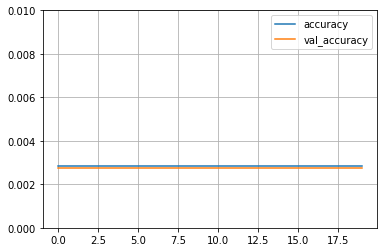

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.DataFrame(history.history)
data[['accuracy', 'val_accuracy']].plot()

plt.grid(True)
plt.gca().set_ylim(0, 0.01);